In [19]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
# read the csv file using read_csv function of pandas
train = pd.read_csv('annotations.csv')
train.head()

,image_names,brain_type,xmin,ymin,xmax,ymax
0,case_2.png,Ischemic,141,201,156,218


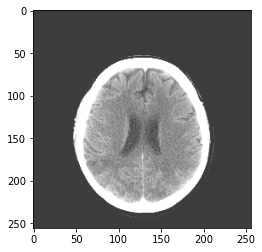

In [16]:
# reading single image using imread function of matplotlib
image = plt.imread('images/case_2.png')
plt.imshow(image)

In [17]:
# Number of unique training images
train['image_names'].nunique()

1

In [18]:
# Number of classes
train['brain_type'].value_counts()

Ischemic    1
Name: brain_type, dtype: int64

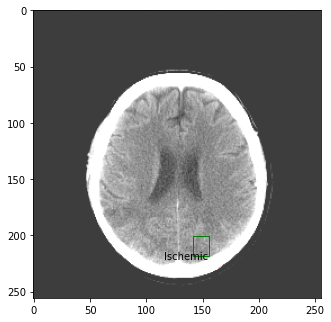

In [20]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('images/case_2.png')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == "case_2.png"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.brain_type == 'Ischemic':
        edgecolor = 'g'
        ax.annotate('Ischemic', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [22]:
data = pd.DataFrame()
data['format'] = train['image_names']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'E:/Faster-rcnn-stroke/images/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['brain_type'][i]

data.to_csv('annotate.txt', header=None, index=None, sep=' ')